In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
import datetime
import time

In [159]:
cd "C:\Users\isom\99designs_project_brief_data_scraping\data_20220301"

C:\Users\isom\99designs_project_brief_data_scraping\data_20220301


In [160]:
# load control group data

In [161]:
df_control = pd.read_csv('cleaned_contests_webpage.csv')

In [162]:
df_control.columns

Index(['url', 'seeker', 'overview', 'company_name',
       'description_of_organization_and_audience', 'requirements',
       'number_of_pages', 'page_descriptions', 'existing_website',
       'example_websites', 'start_time', 'entry_count', 'deleted_entry_count',
       'deleted', 'withdrawn', 'declined', 'prize', 'entries',
       'deleted_entries', 'winners', 'prize_log', 'start_date',
       'number_of_winners', 'multi_winner', 'total_submission',
       'number_of_participants', 'number_of_submission_per_participants'],
      dtype='object')

In [163]:
# construct dataframe for before/control statistics by day 
control = df_control.groupby(['start_date']).count().reset_index().iloc[:,:2]
control.rename(columns={'url':'seekers'},inplace=True)

control['avg_prize'] = list(df_control.groupby(['start_date']).mean()['prize'])
control['solvers'] = list(df_control.groupby(['start_date']).mean()['number_of_participants'])
control['total_submission'] = list(df_control.groupby('start_date').mean().reset_index()['total_submission'])
control['number_of_submission_per_participants'] = list(df_control.groupby('start_date').mean().reset_index()['number_of_submission_per_participants'])

In [164]:
control.head()

,start_date,seekers,avg_prize,solvers,total_submission,number_of_submission_per_participants
0,2010-10-05,3,536.666667,13.000000,51.333333,4.439072
1,2010-10-06,3,708.000000,28.666667,161.333333,6.142002
2,2010-10-07,5,968.800000,12.000000,65.400000,6.219816
3,2010-10-08,6,732.333333,14.000000,85.333333,5.815221
4,2010-10-09,1,600.000000,16.000000,90.000000,5.625000


In [170]:
# by week
df_control.start_date = pd.to_datetime(df_control.start_date,format='%Y-%m-%d')
df_control_date = df_control.set_index('start_date')
control_week = df_control_date.resample('W').mean().reset_index()[['start_date','prize','number_of_participants','total_submission','number_of_submission_per_participants']]
control_week.rename(columns={'prize':'avg_prize','number_of_participants':'solvers'},inplace=True)
control_week['seekers'] = df_control_date.resample('W').count().reset_index()['seeker']

In [171]:
order = list(control.columns)
control_week = control_week[order]

In [173]:
control_week.head()

,start_date,seekers,avg_prize,solvers,total_submission,number_of_submission_per_participants
0,2010-10-10,19,749.789474,15.842105,86.00000,5.660322
1,2010-10-17,31,698.258065,15.064516,67.00000,4.748436
2,2010-10-24,25,663.520000,13.840000,46.80000,3.354940
3,2010-10-31,32,679.687500,11.843750,46.84375,4.056489
4,2010-11-07,36,657.250000,11.916667,49.25000,4.338053


In [174]:
# match the day in the control group
before_1 = before[before.start_date>='2010-10-05'].copy()
before_after_1 = before_after[(before_after.start_date>='2010-10-05')&(before_after.start_date<='2011-03-08')].copy()

In [175]:
# draw picture

def draw_picture3(x_name,y_name,df,df_before,df_control,day_or_week):
    plt.figure(figsize=(75, 30))
    plt.xticks(rotation=90)
    plt.plot(list(df[x_name]),list(df[y_name]),label='treated group',color='red')
    plt.plot(list(df_control[x_name]),list(df_control[y_name]),label='control group',color='blue')
    plt.legend()
    font2 = {'family' : 'Times New Roman','weight' : 'normal','size' : 50}
    plt.xlabel(x_name,font2)
    plt.ylabel(y_name,font2)
    plt.title(y_name+"_per_"+day_or_week,font2)
    max_value_treat = max(df[y_name])
    max_value_control = max(df_control[y_name])
    plt.plot([df_before.iloc[-1,0],df_before.iloc[-1,0]],[0,max(max_value_control,max_value_treat)], linewidth=1, color='black')
    plt.savefig(y_name+'_control_treatment_by_'+day_or_week+'.png')

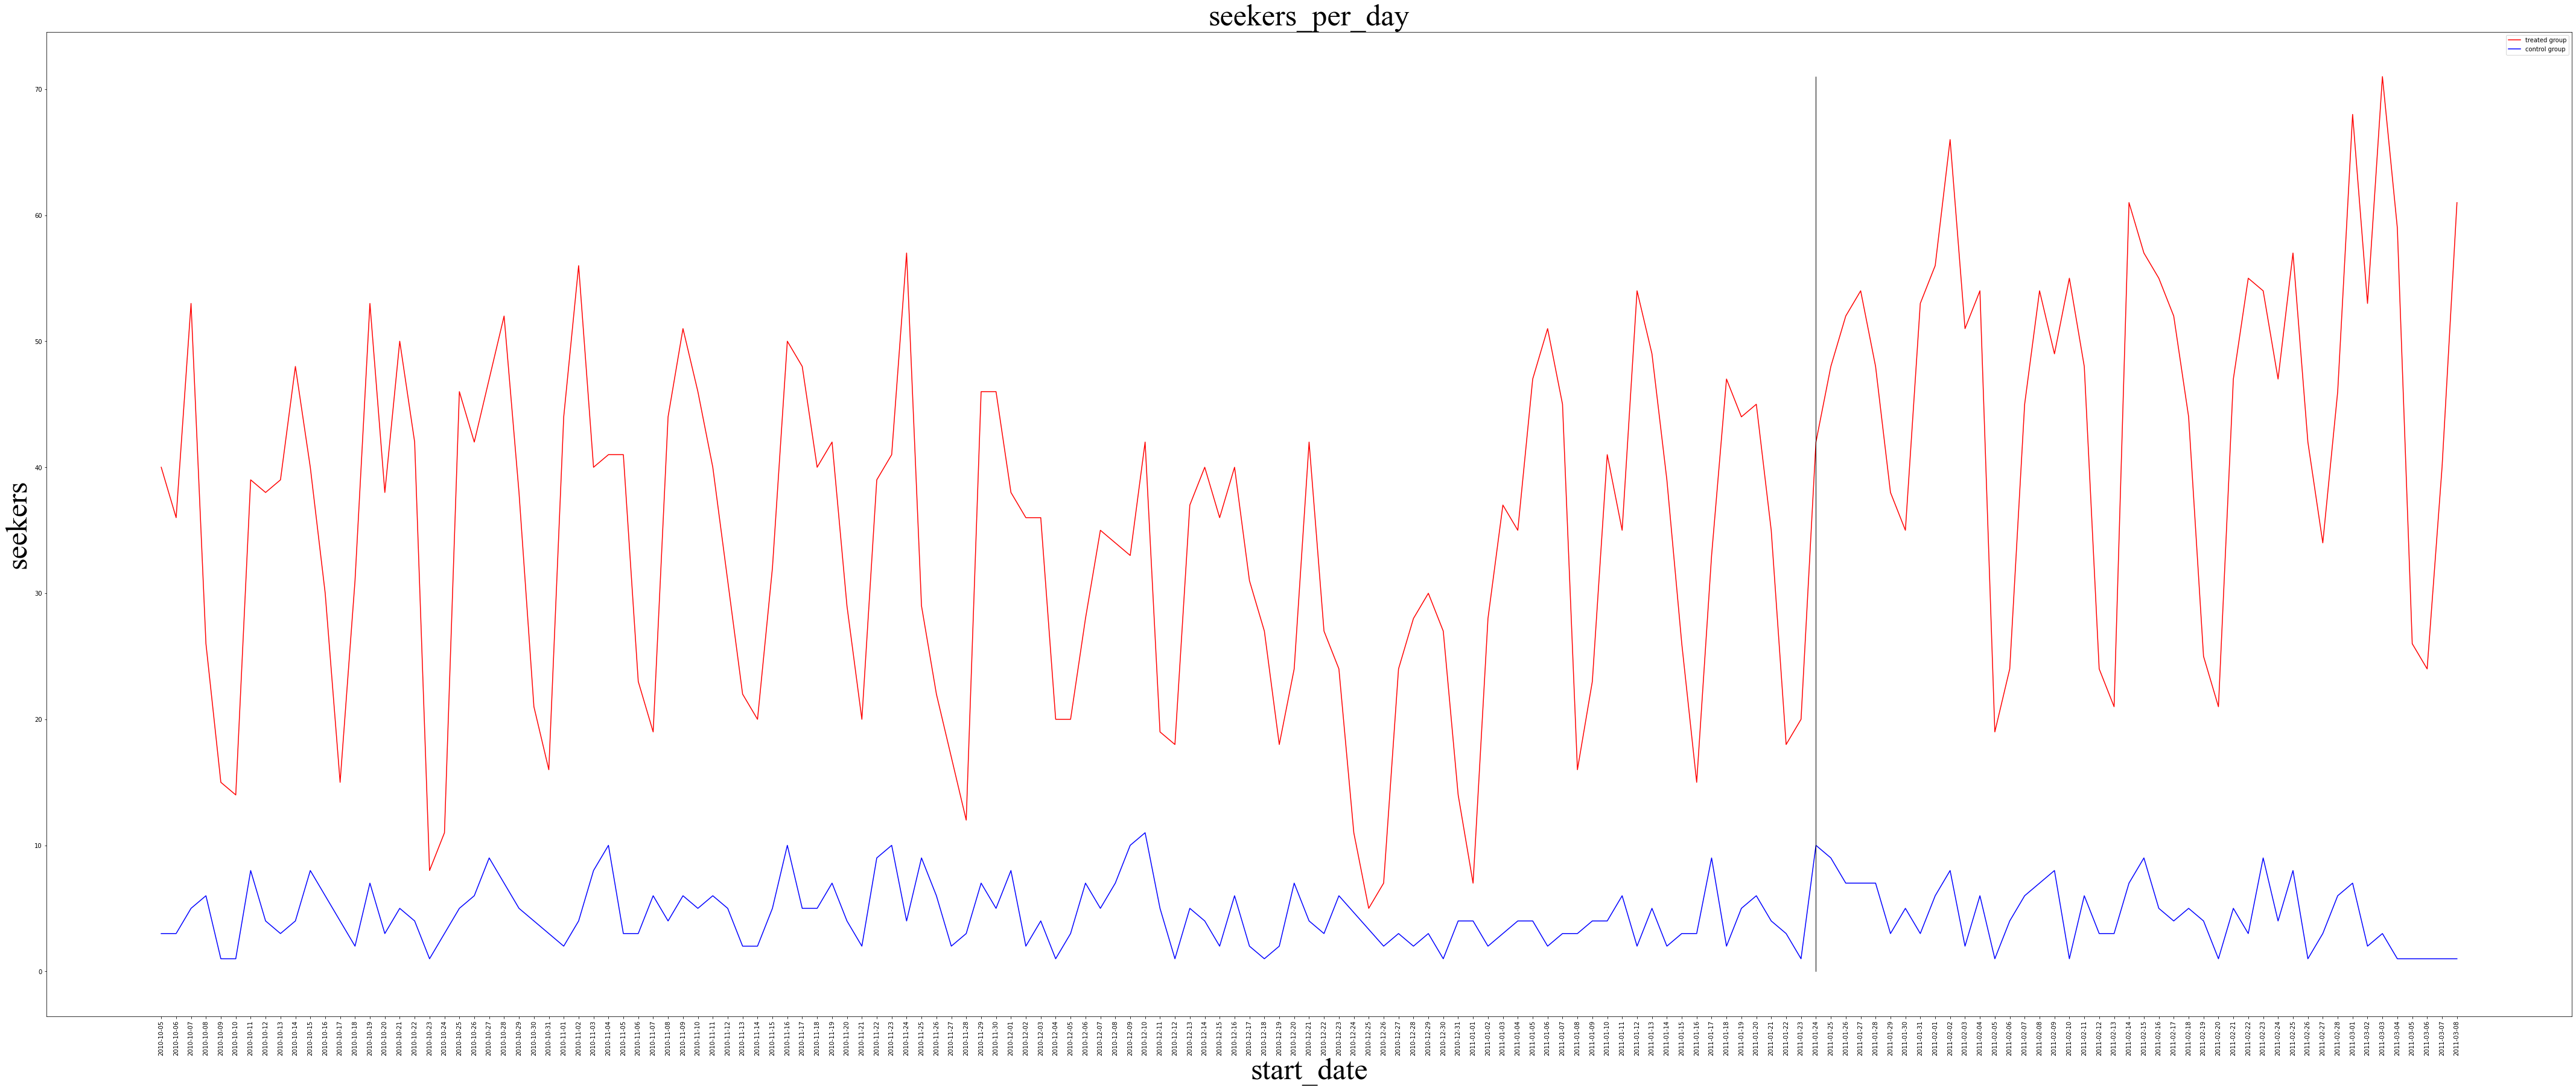

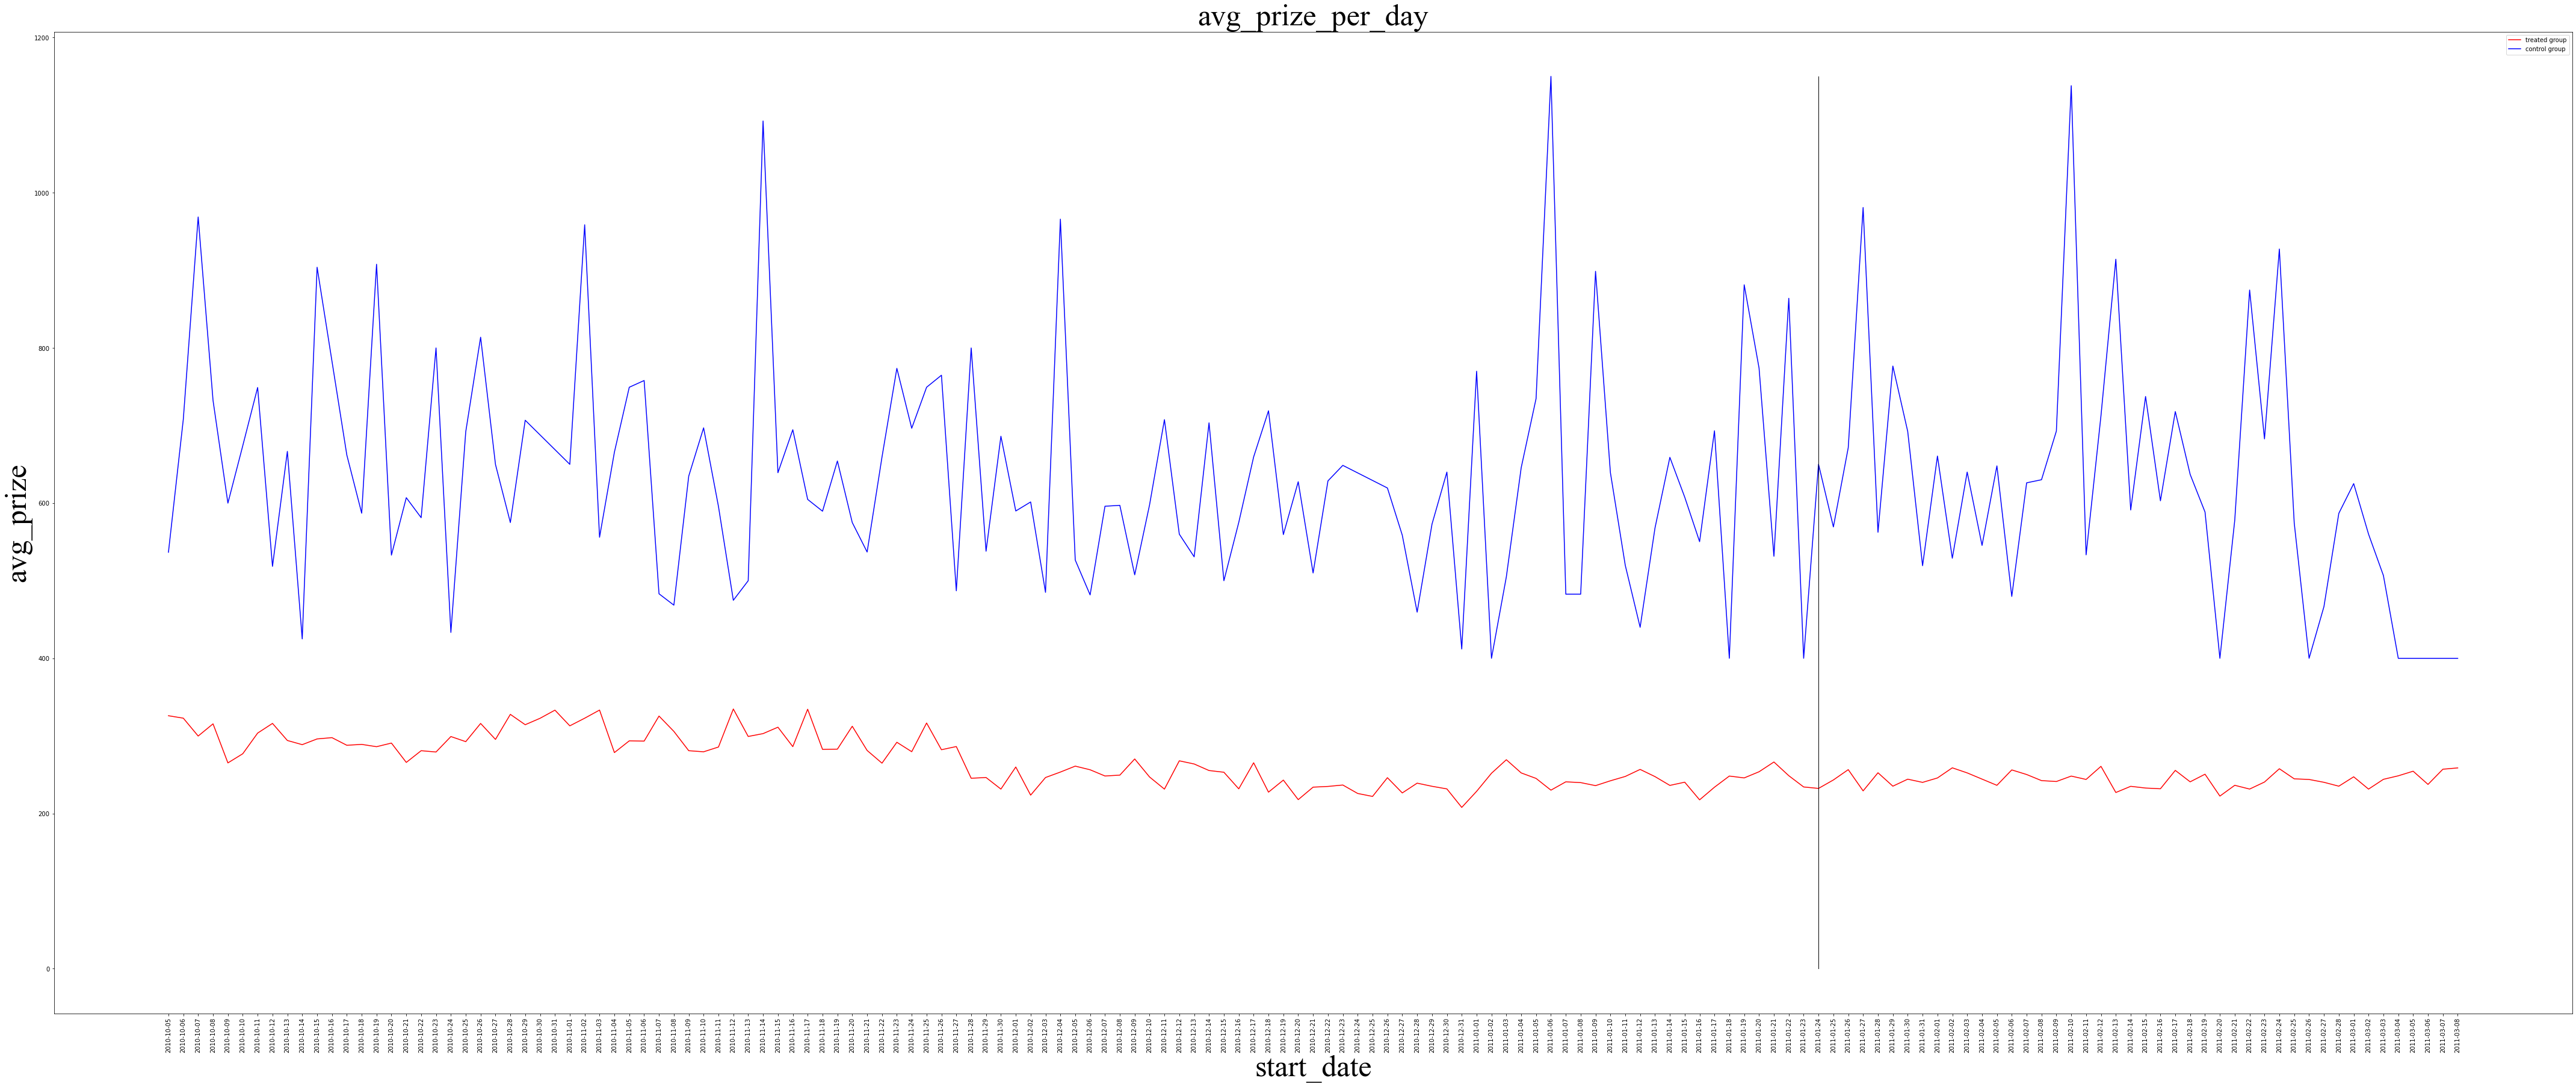

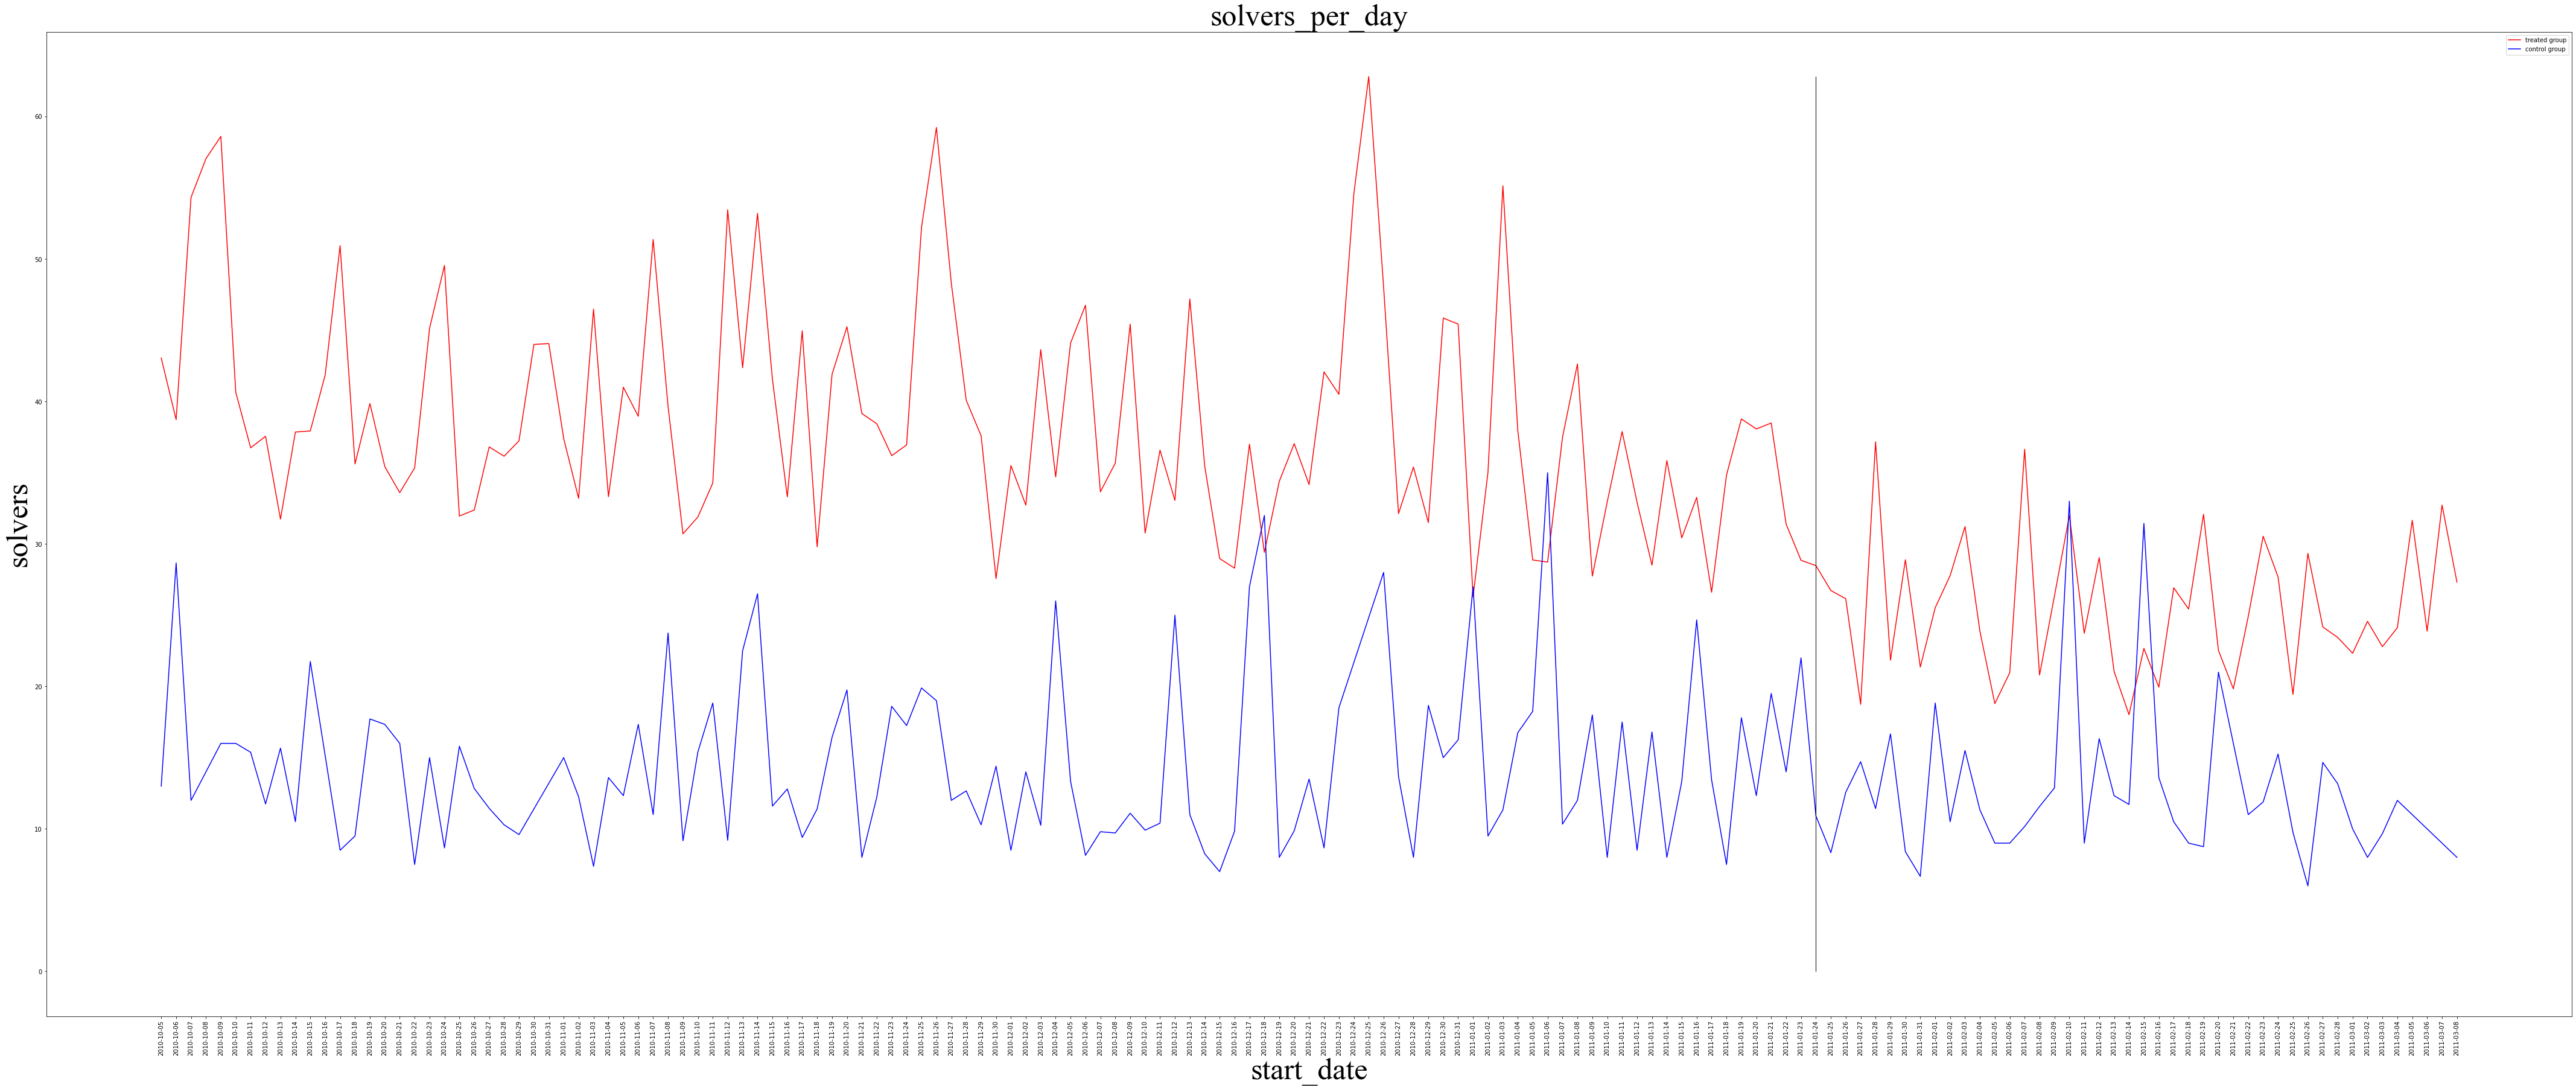

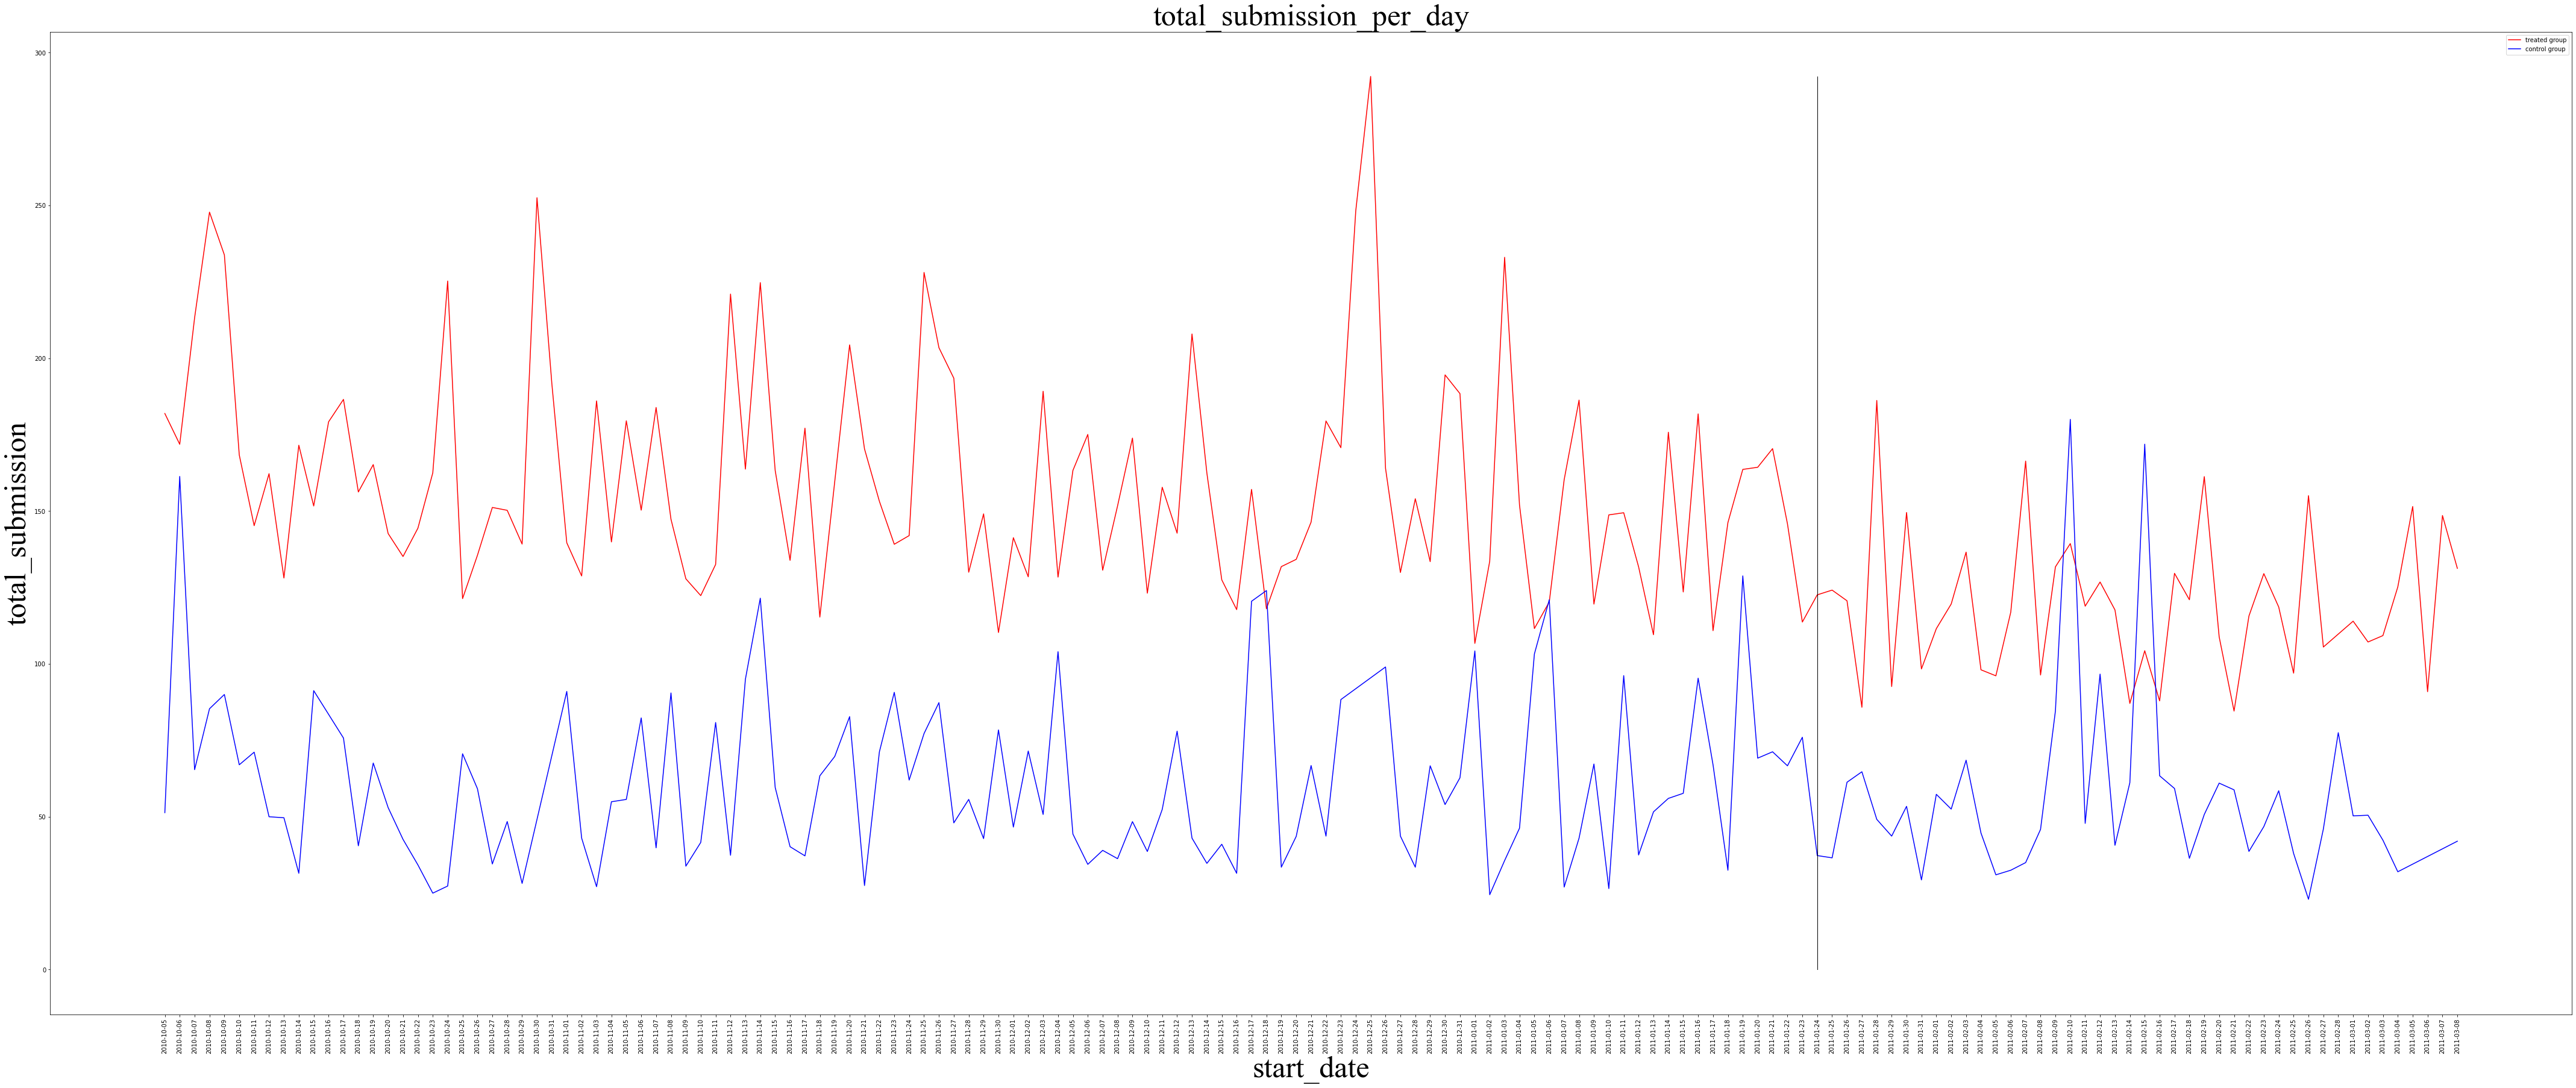

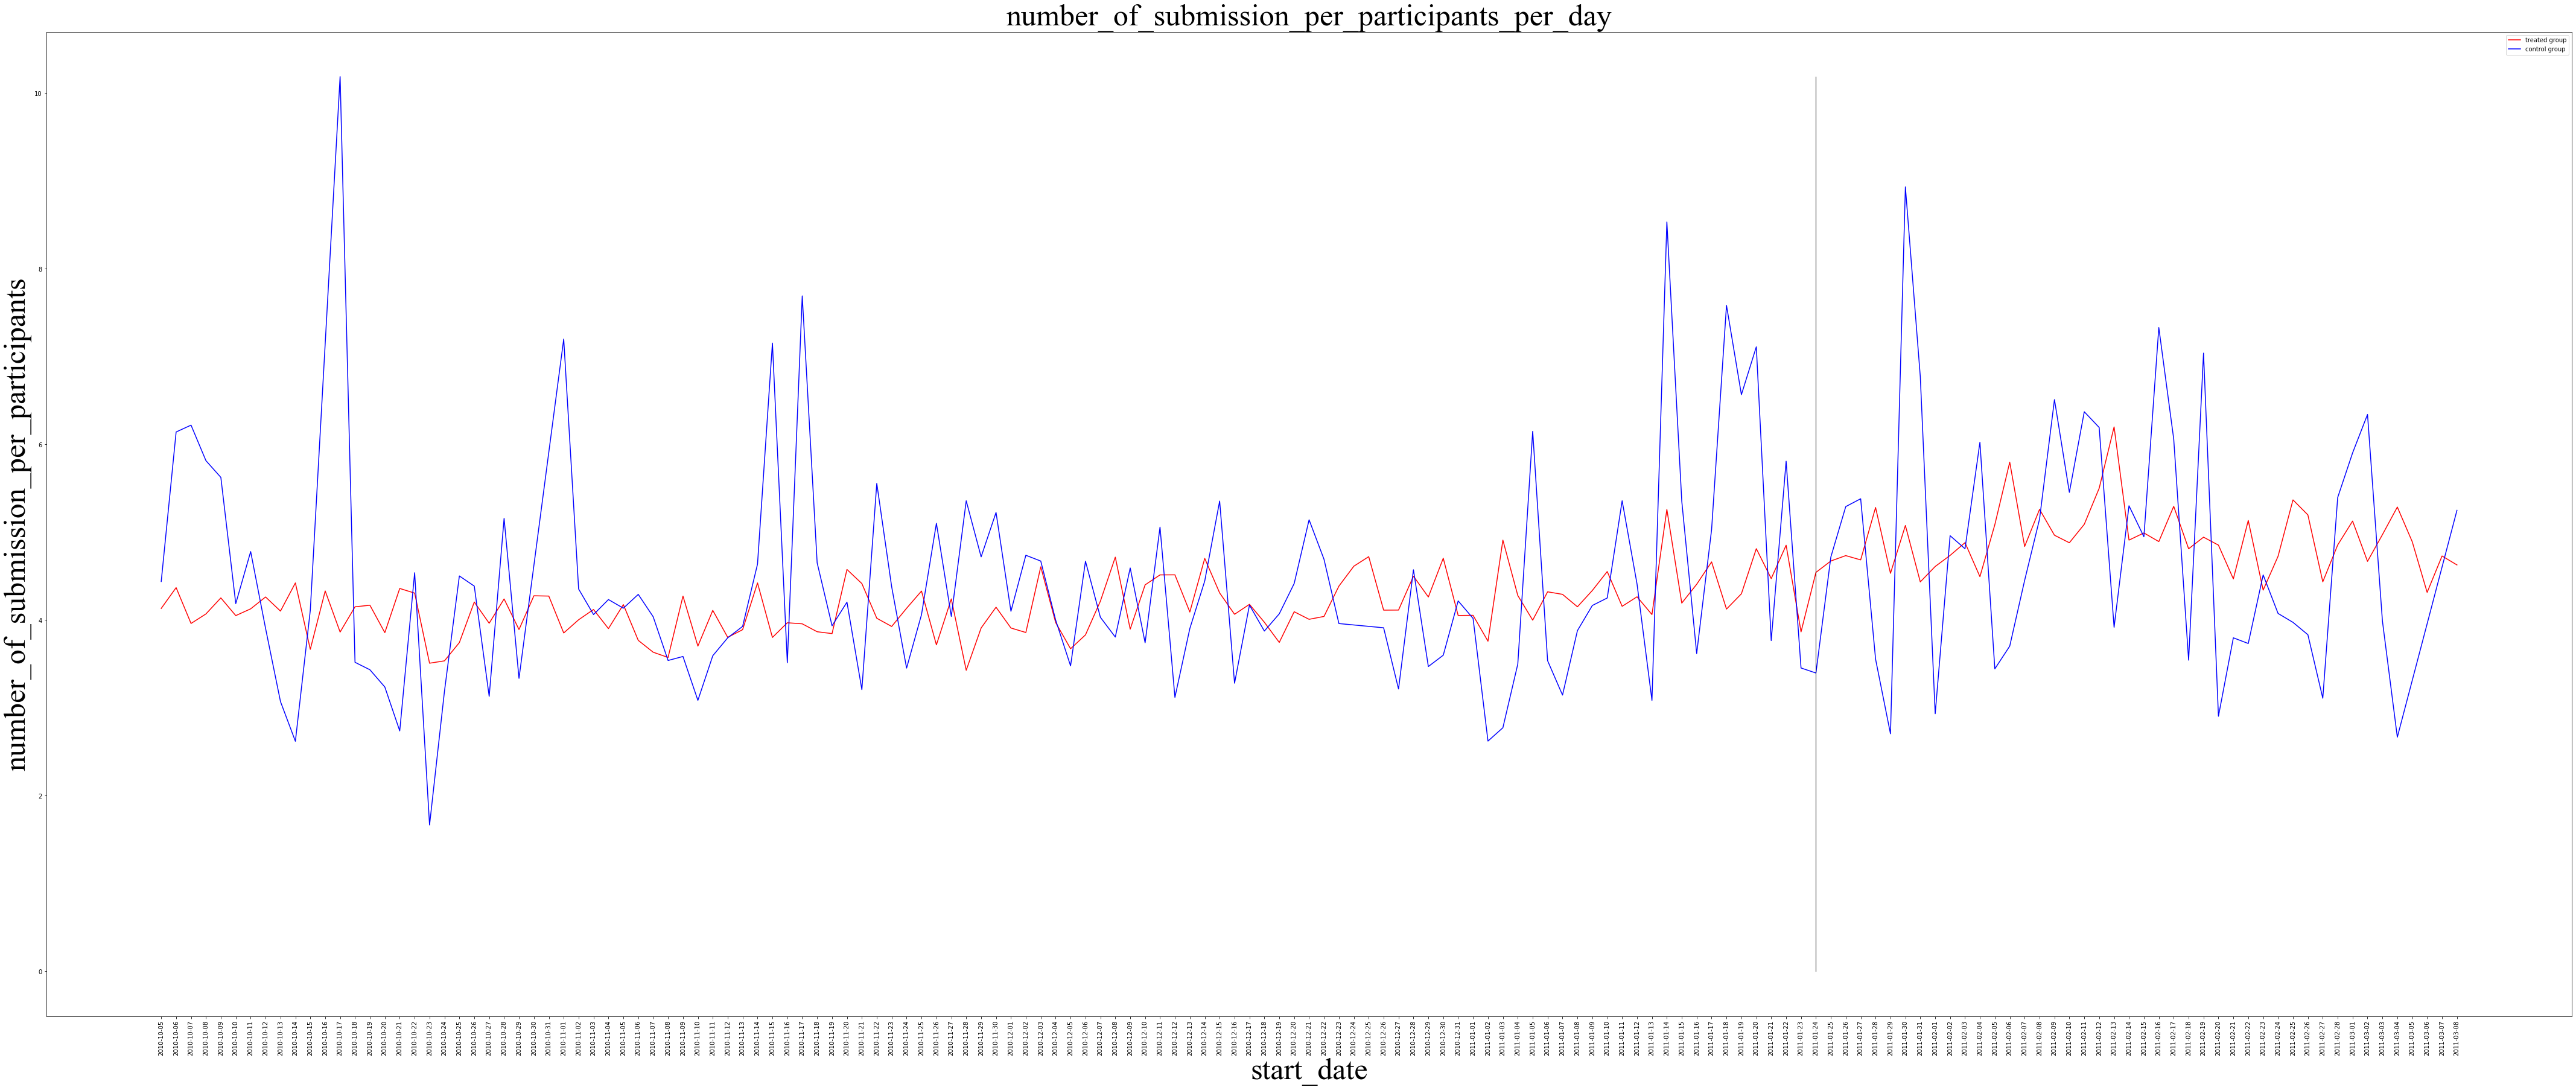

In [176]:
for i in range(1,len(control.columns)):
    draw_picture3('start_date',before_after_1.columns[i],before_after_1,before_1,control,'day')

In [177]:
before_week = pd.read_excel('before_by_week.xlsx',index_col=0)
before_after_week = pd.read_excel('before_after_week.xlsx',index_col=0)

In [178]:
before_week.head()

,start_date,seekers,avg_prize,solvers,total_submission,number_of_submission_per_participants
0,2010-07-11,10,279.900000,40.800000,175.900000,4.055996
1,2010-07-18,202,246.782178,34.925743,135.594059,3.803206
2,2010-07-25,205,248.229268,37.356098,150.356098,3.989273
3,2010-08-01,223,262.139013,36.560538,149.089686,4.016180
4,2010-08-08,225,269.671111,37.666667,154.533333,4.199459


In [179]:
control_week['seekers'] = df_control_date.resample('W').count().reset_index()['seeker']
control_week = control_week[list(before_week.columns)]
control_week.to_excel('control_week.xlsx')

In [180]:
control_week.head()

,start_date,seekers,avg_prize,solvers,total_submission,number_of_submission_per_participants
0,2010-10-10,19,749.789474,15.842105,86.00000,5.660322
1,2010-10-17,31,698.258065,15.064516,67.00000,4.748436
2,2010-10-24,25,663.520000,13.840000,46.80000,3.354940
3,2010-10-31,32,679.687500,11.843750,46.84375,4.056489
4,2010-11-07,36,657.250000,11.916667,49.25000,4.338053


In [58]:
before_week_1 = before_week[before_week['start_date']>='2010-10-10']
before_after_week_1 = before_after_week[(before_after_week['start_date']>='2010-10-10')&(before_after_week['start_date']<='2011-03-13')]

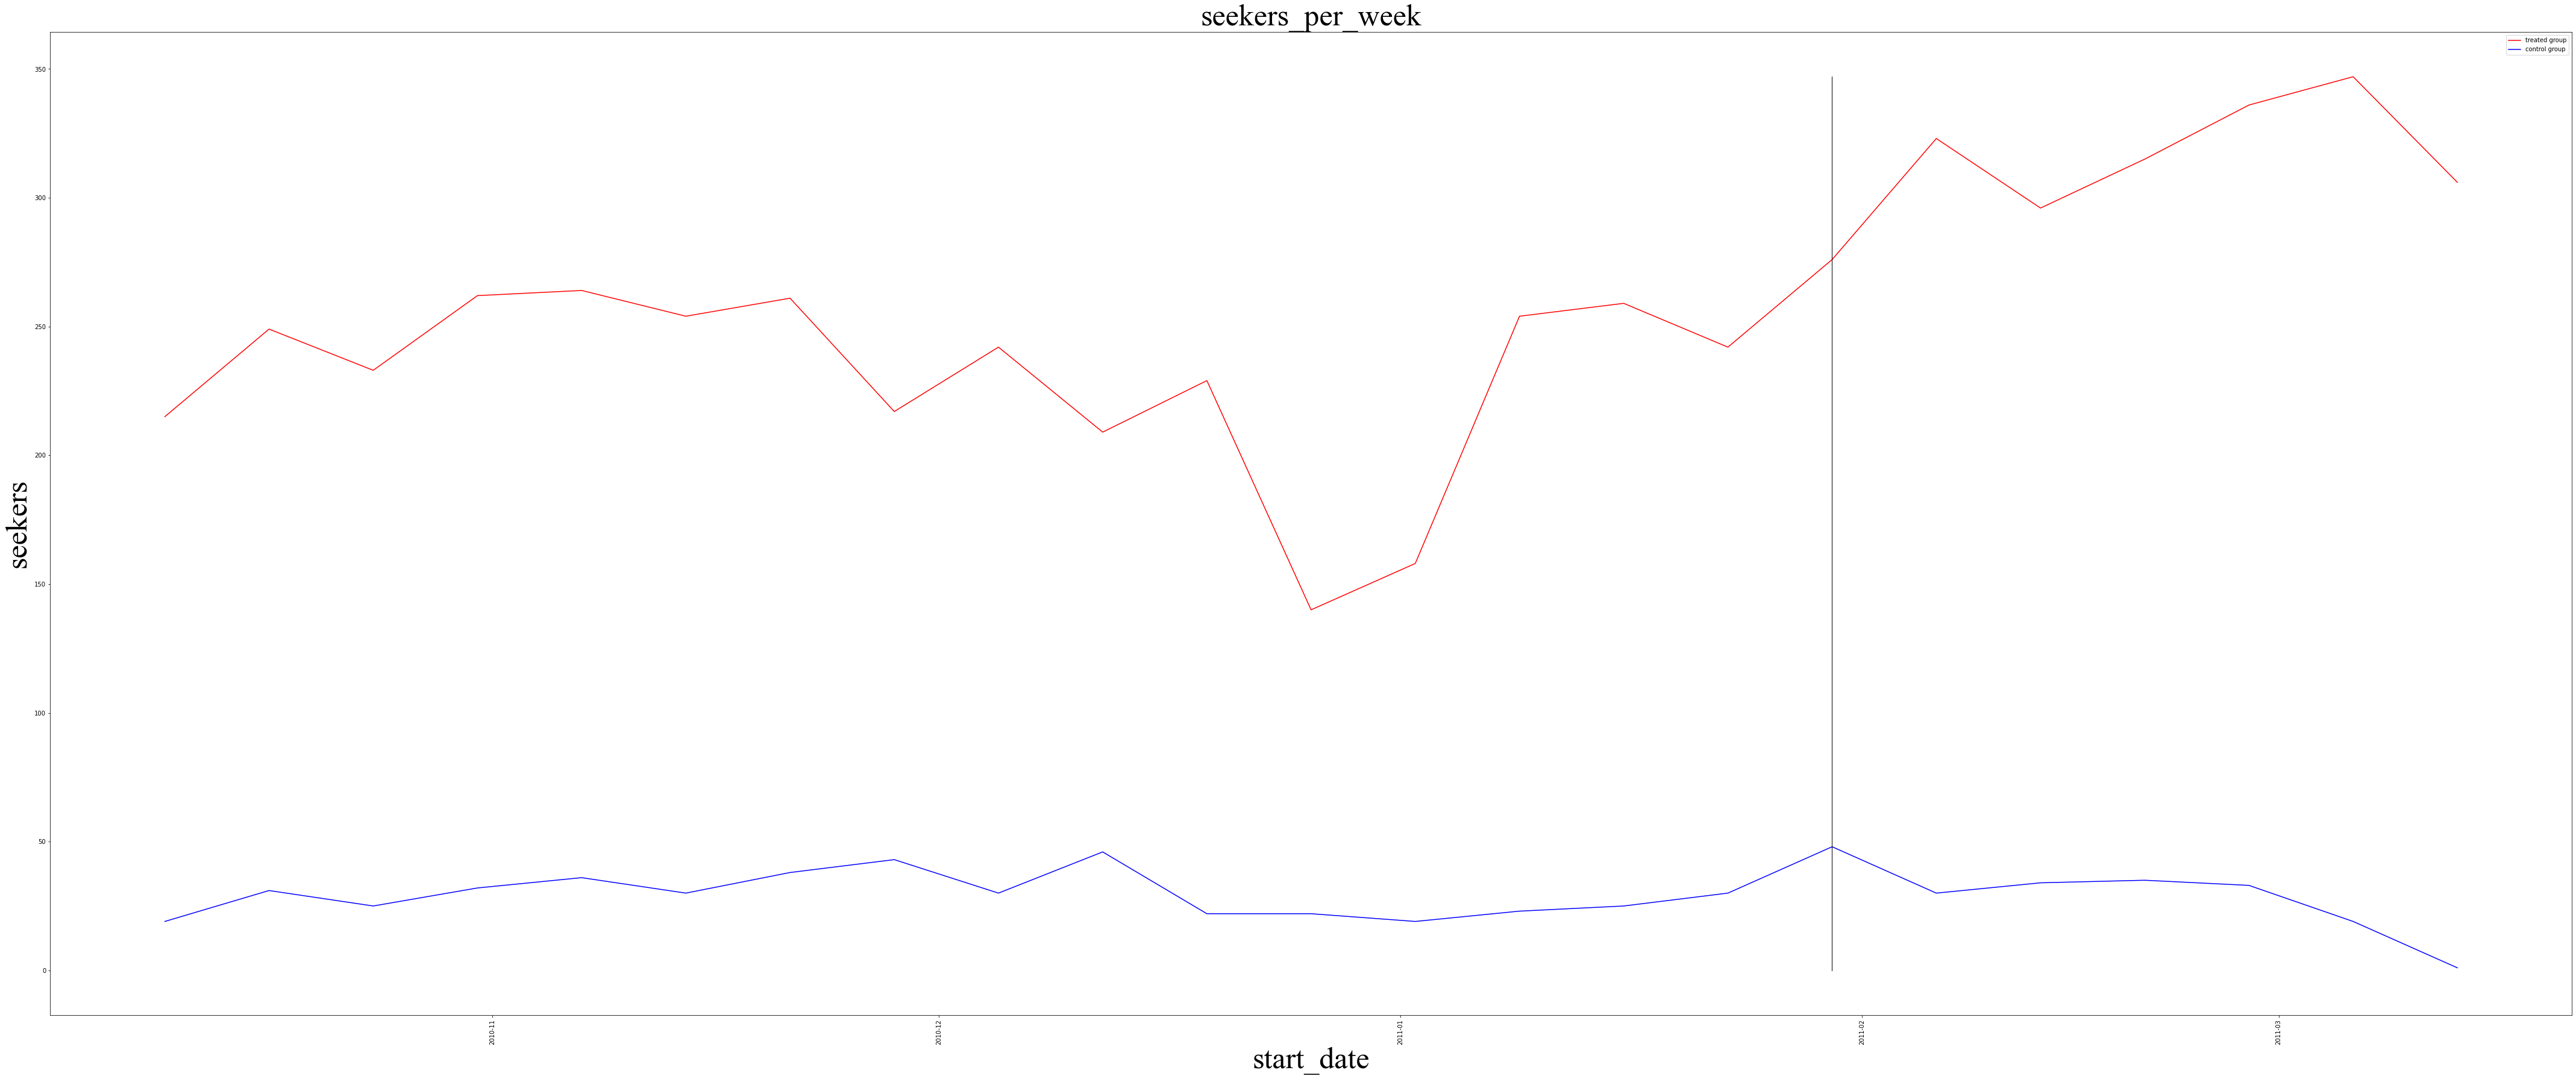

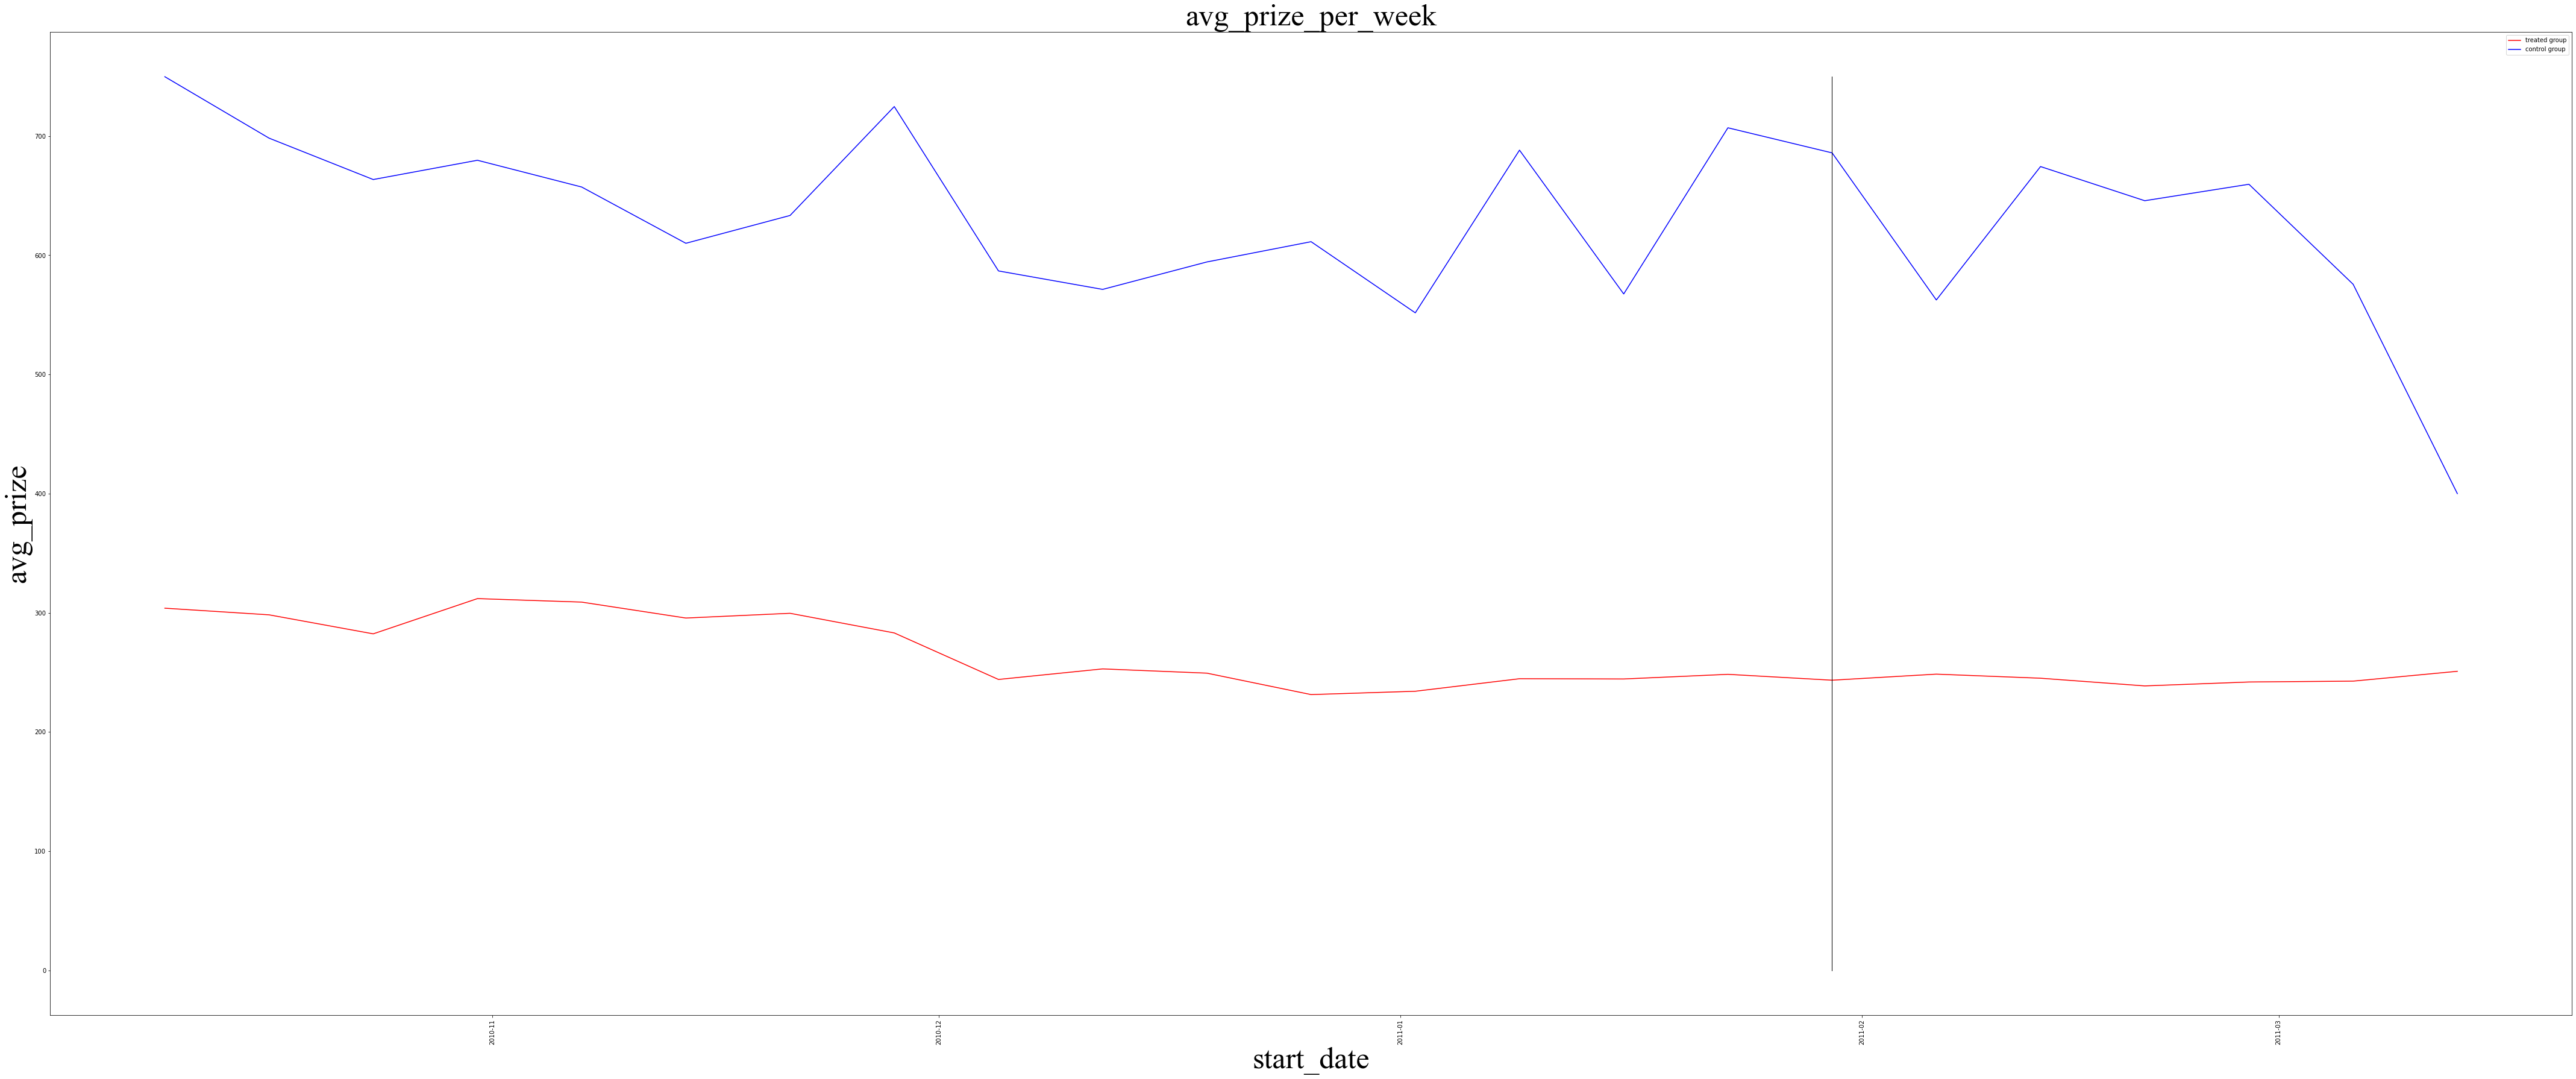

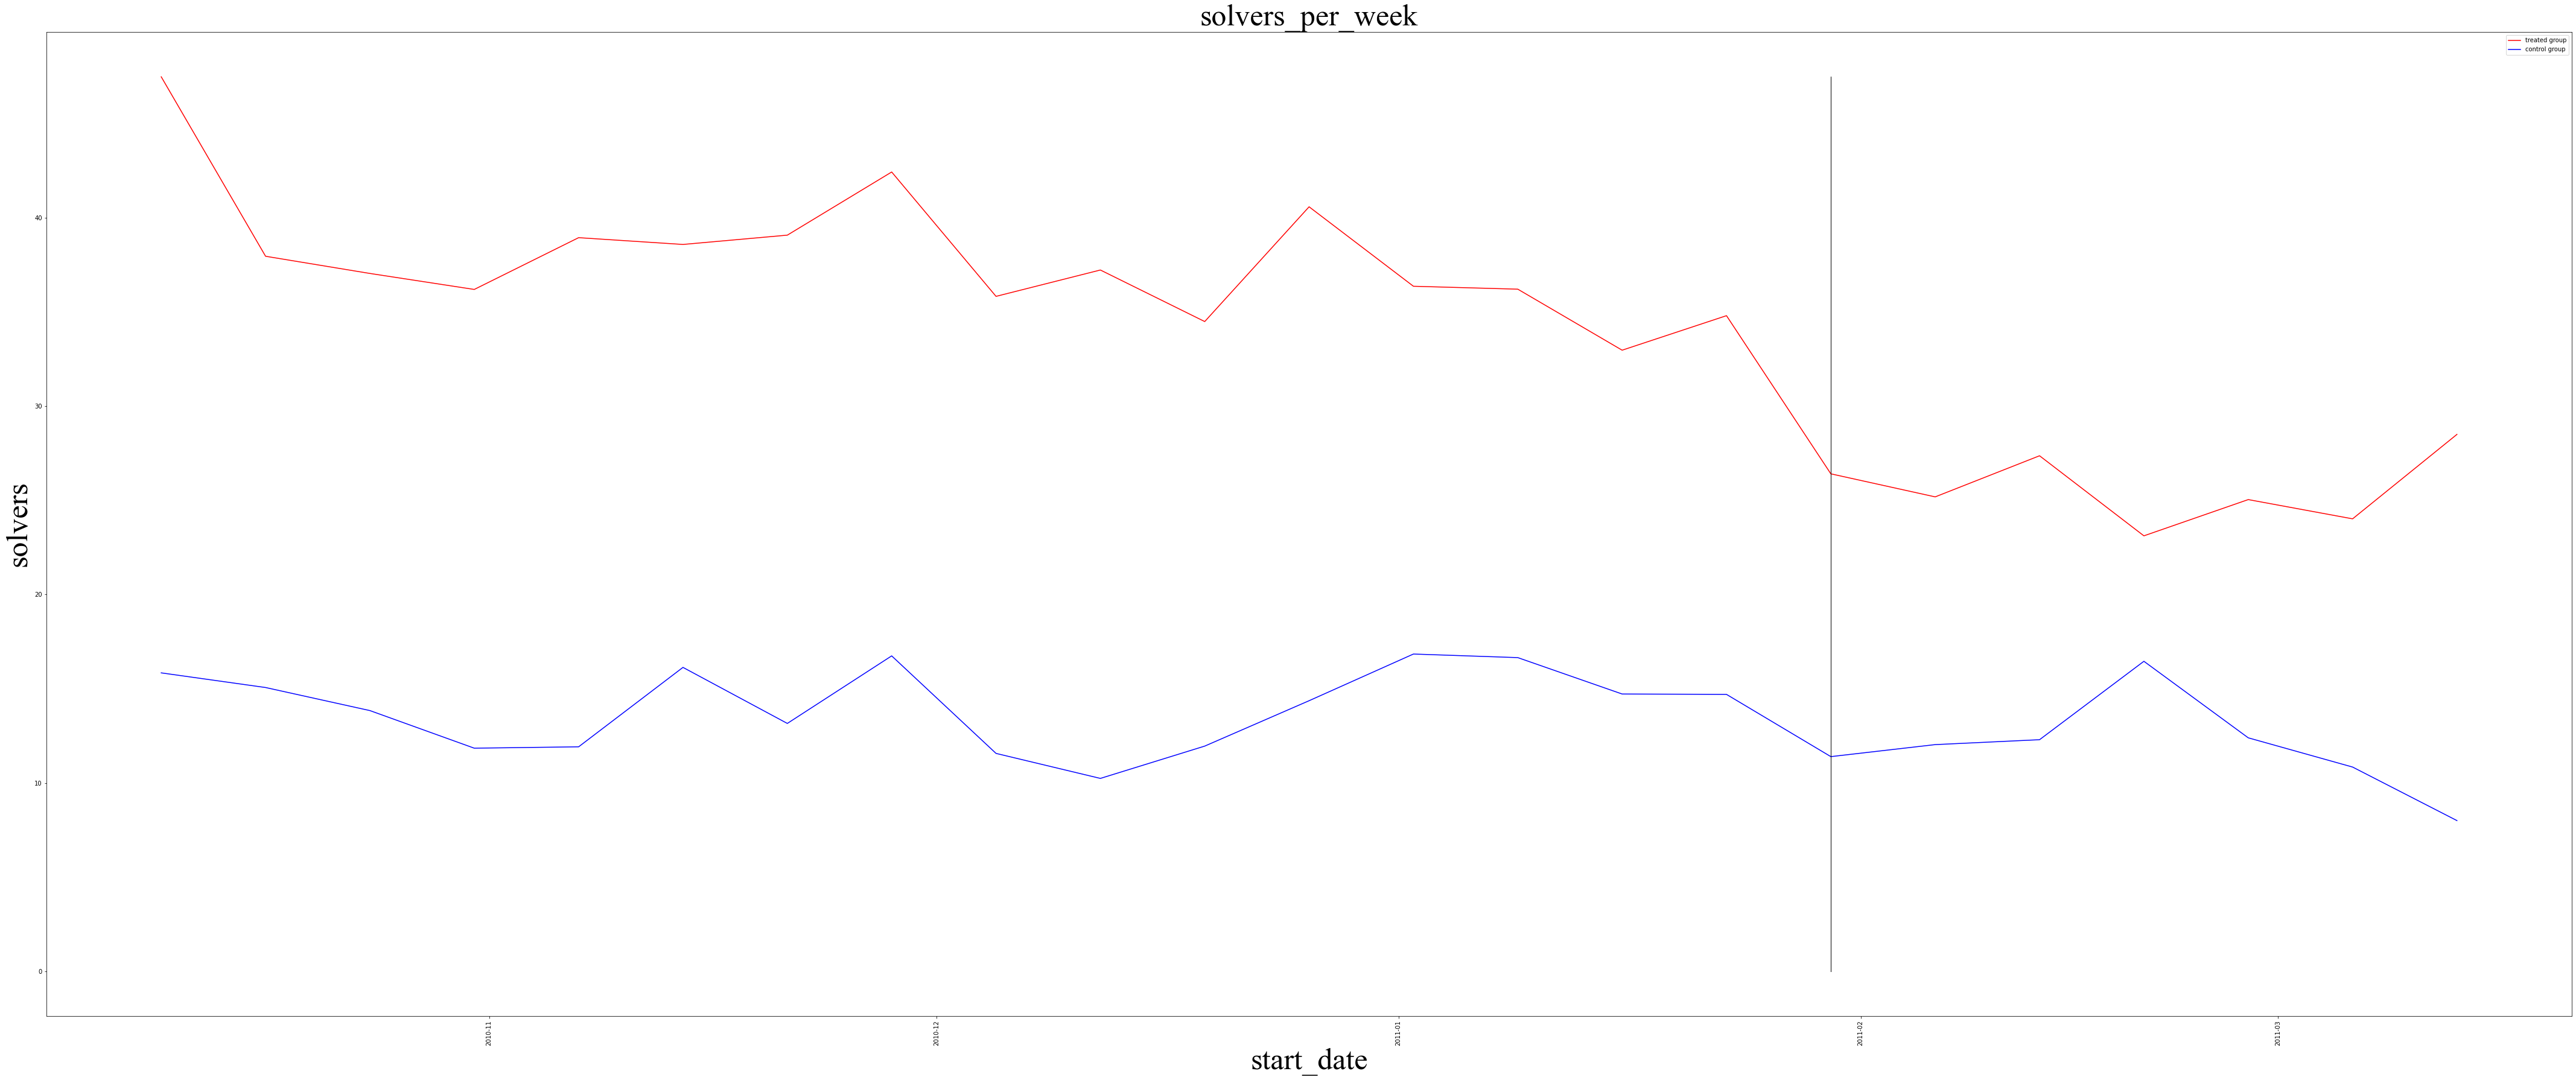

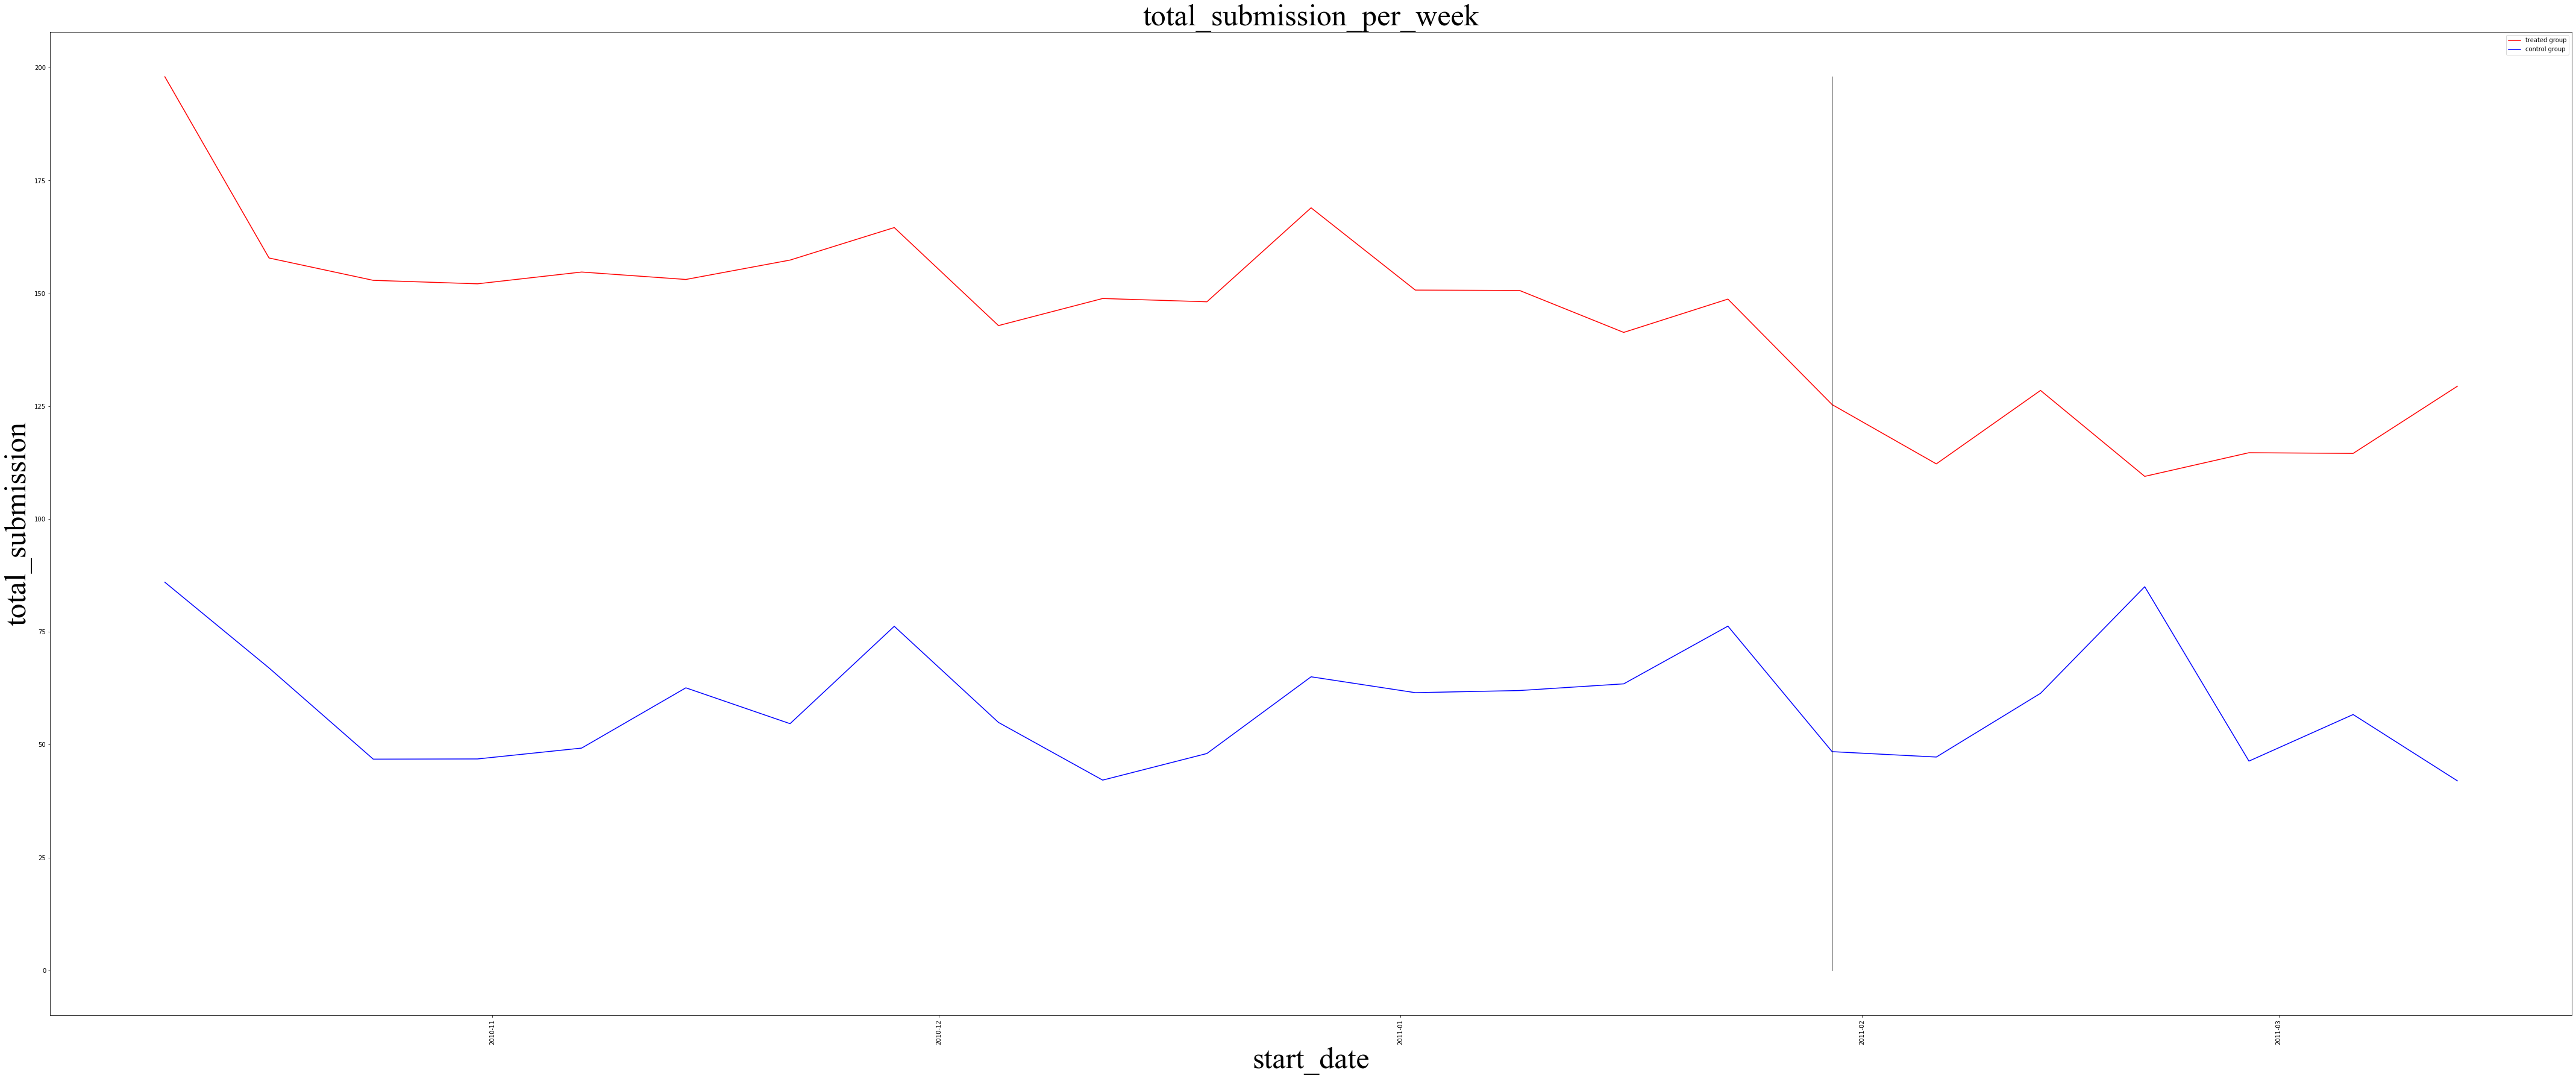

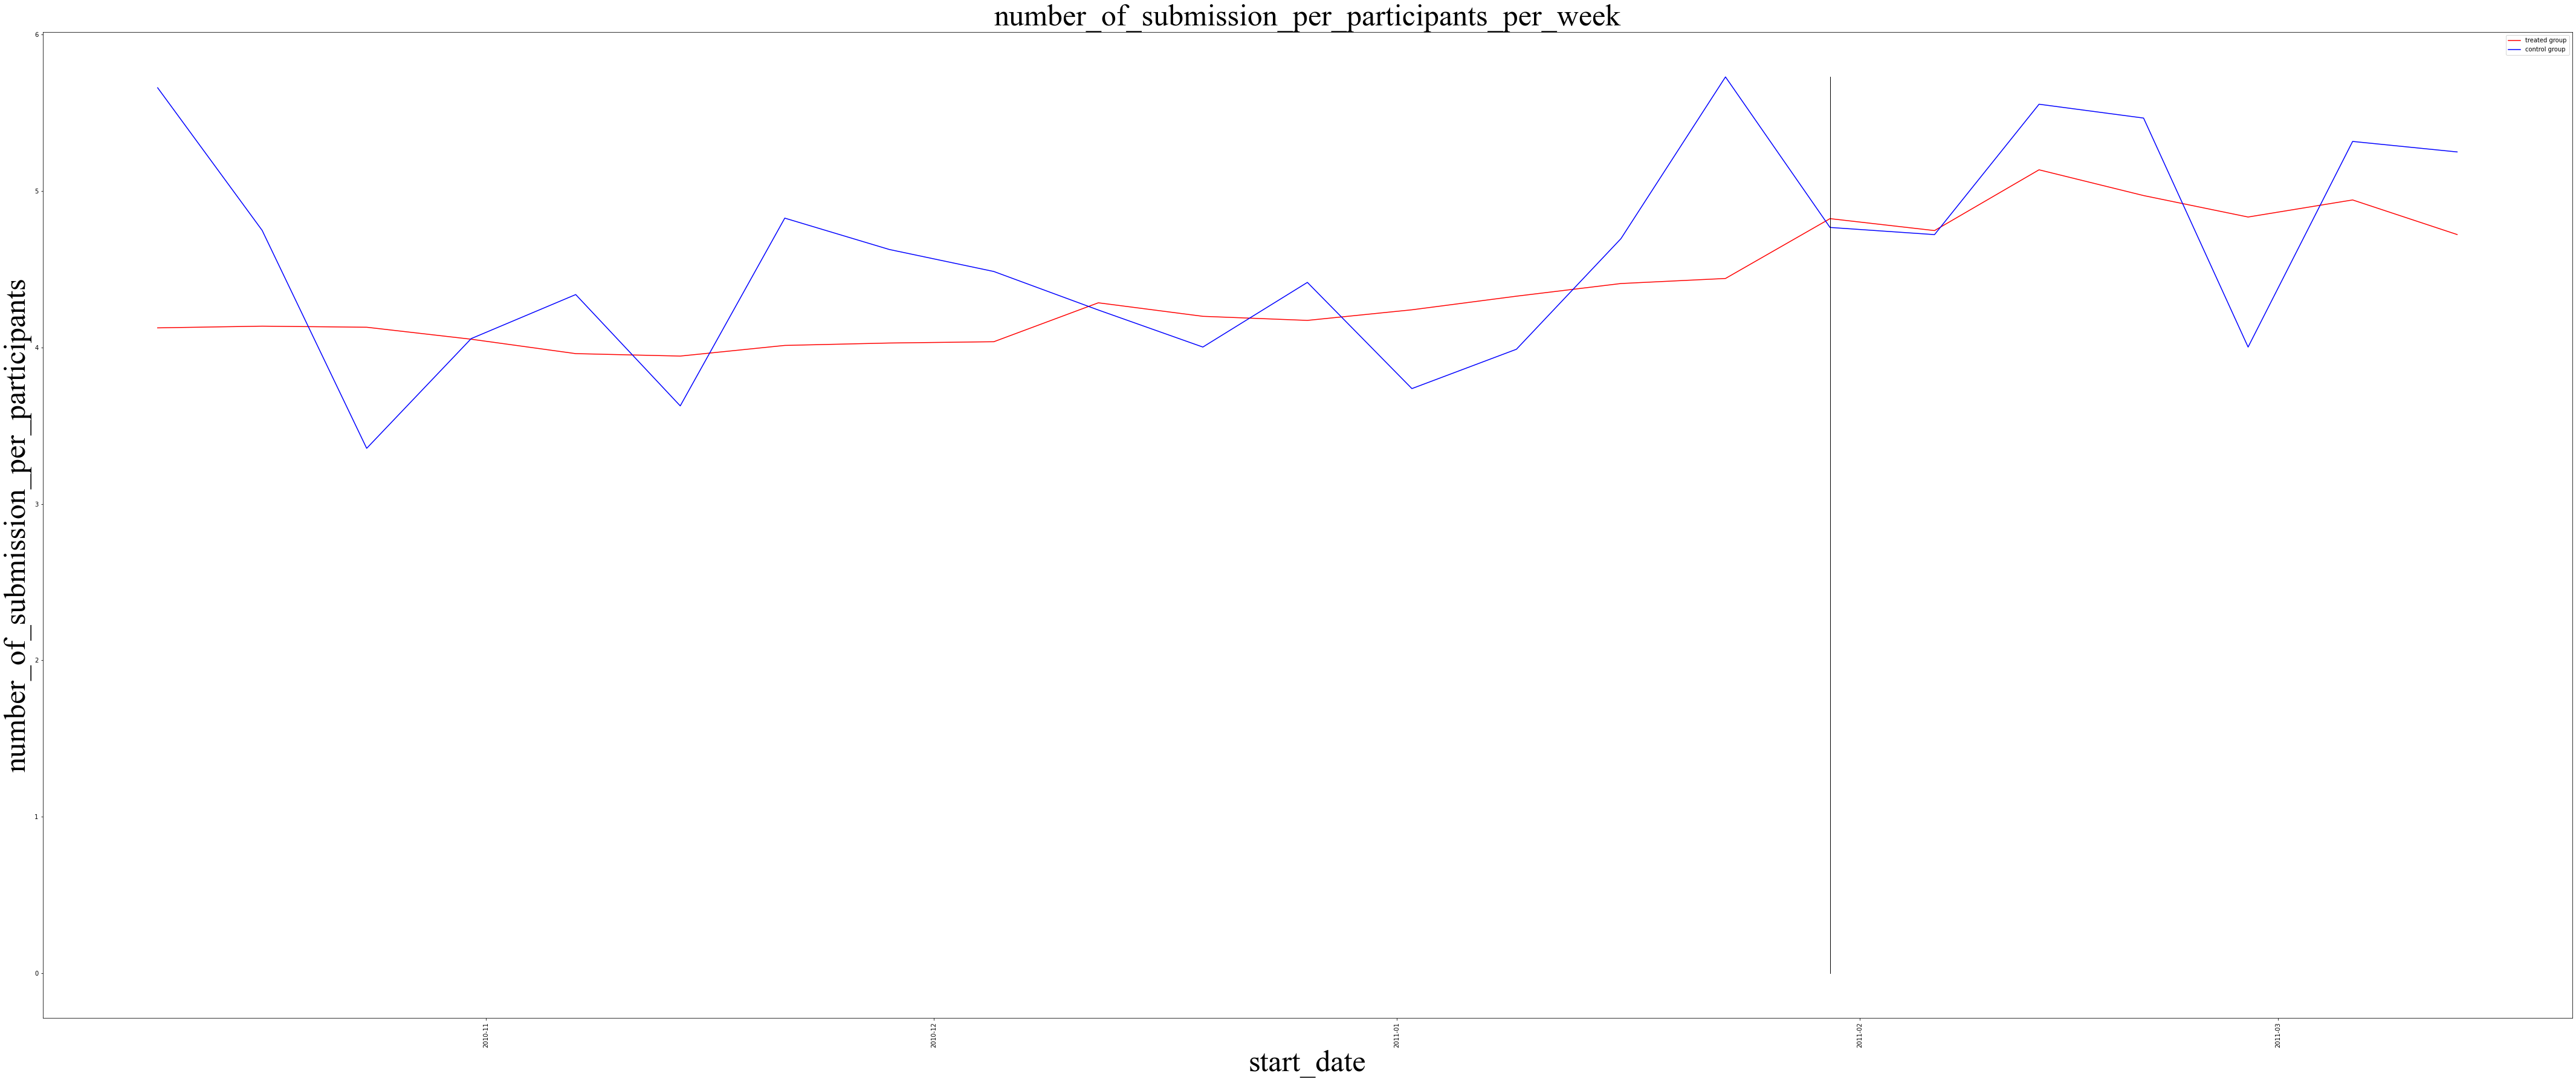

In [181]:
for i in range(1,len(control.columns)):
    draw_picture3('start_date',before_after_week_1.columns[i],before_after_week_1,before_week_1,control_week,'week')

In [182]:
#gen control/treated
control['treated'] = 0
control_after = []
for i in control['start_date']:
    if i<='2011-01-24':
        control_after.append(0)
    else:
        control_after.append(1)
        
control['after'] = control_after

In [184]:
#gen before_after_1/treated
before_after_1['treated'] = 1
before_after_1_after = []
for i in before_after_1['start_date']:
    if i<='2011-01-24':
        before_after_1_after.append(0)
    else:
        before_after_1_after.append(1)
        
before_after_1['after'] = before_after_1_after

In [185]:
did_data = pd.concat([before_after_1,control])

In [186]:
did_data['treated_after'] = did_data['treated'] * did_data['after']

In [187]:
import statsmodels.formula.api as smf

In [201]:
for i in did_data.columns[1:-3]:
    est = smf.ols(formula= i+' ~ treated + after + treated_after', data=did_data).fit()
    print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                seekers   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     313.4
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           8.30e-92
Time:                        20:22:10   Log-Likelihood:                -1104.1
No. Observations:                 302   AIC:                             2216.
Df Residuals:                     298   BIC:                             2231.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.4953      0.911      4.933

In [207]:
did_data.to_excel('design_did_aggregated.xlsx')